In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scvelo as scv
import matplotlib.pyplot as plt
#from moscot.problems.time import TemporalNeuralProblem, TemporalProblem

## # Remove cells with too little splicing information

In [2]:
Path='/home/mgander/pancreas_multiome/data2'

adata=sc.read_h5ad(f'{Path}/lung_heoa_3khvg.h5ad')
adata

AnnData object with n_obs × n_vars = 225487 × 3000
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_genes', 'sample_id', 'level_1', 'level_2', 'level_3', 'sort_batch', 'Cell_type', 'n_counts', 'batch', 'publication', 'sample_name', 'tissue', 'derive', 'detail_tissue', 'time', 'time2', 'main_cells', 'protocol', 'tech', 'tech_detail', 'molecular', 'gel', 'conditions_combined'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'hvg'
    obsm: 'X_umap'
    layers: 'ambiguous', 'spliced', 'unspliced'

In [3]:
adata.obsm['X_scPoli']=adata.obsm['X_umap']

In [4]:
adata.obs['day']=[float(str(a).split('day')[0]) if str(a) not in ['early', 'late', 'NA', 'NaN'] else np.NaN for a in adata.obs['time'] ]

In [5]:
adata.obs['day'].value_counts()

46.0    7559
21.0    5574
70.0    3970
42.0    2917
56.0    1947
0.0     1924
28.0    1649
Name: day, dtype: int64

In [8]:
#adata.obsm['X_umap_initial']=adata.obsm['X_umap'].copy()

#del adata.obsp
#del adata.uns['neighbors']
sc.pp.neighbors(adata, use_rep='X_scPoli')
sc.tl.umap(adata)

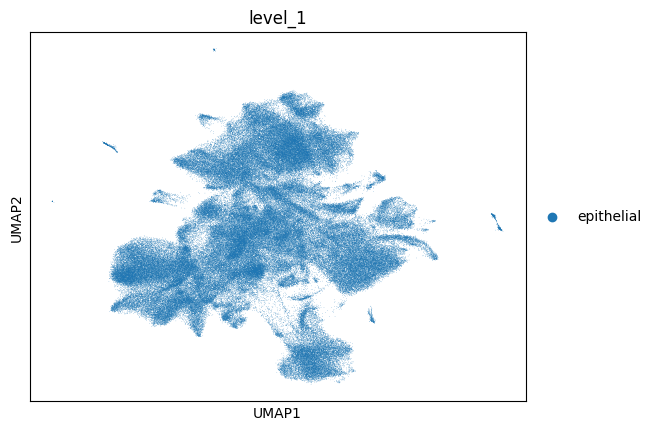

In [9]:
sc.pl.umap(adata, color='level_1')

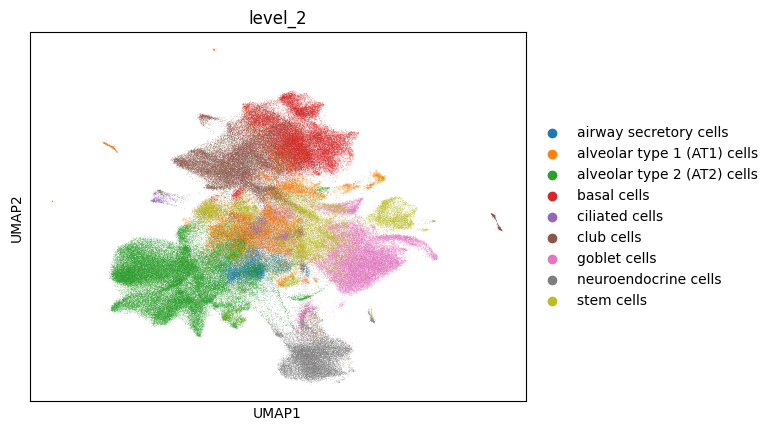

In [10]:
sc.pl.umap(adata, color='level_2')

In [11]:
# Looks much better, stem cells are indeed in the center

In [12]:
adata.obs['day']=[float(str(a).split('day')[0]) if str(a) not in ['early', 'late', 'NA', 'NaN'] else np.NaN for a in adata.obs['time'] ]

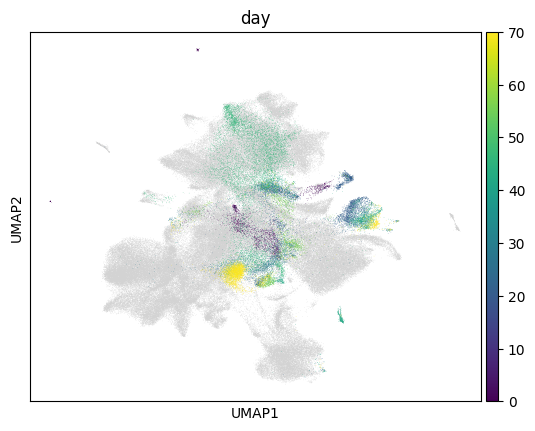

In [13]:
sc.pl.umap(adata, color='day')

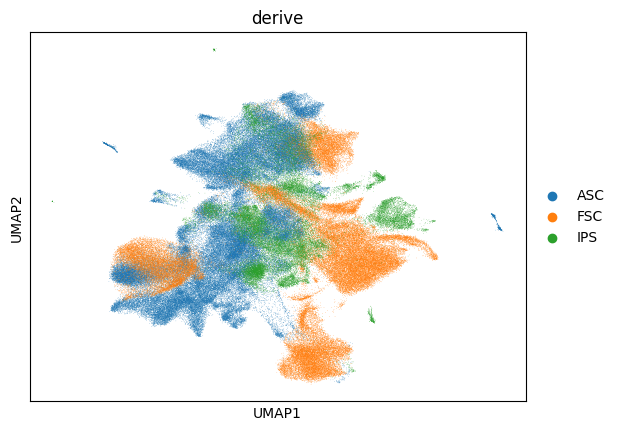

In [14]:
sc.pl.umap(adata, color='derive')

In [17]:
# Remove cells with too little spliced/unspliced counts

wh0=np.asarray(adata.layers['spliced'].sum(1)).flatten()>20
wh1=np.asarray(adata.layers['unspliced'].sum(1)).flatten()>20
wh=wh0&wh1

In [19]:
adata=adata[wh].copy()
adata

AnnData object with n_obs × n_vars = 88797 × 3000
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_genes', 'sample_id', 'level_1', 'level_2', 'level_3', 'sort_batch', 'Cell_type', 'n_counts', 'batch', 'publication', 'sample_name', 'tissue', 'derive', 'detail_tissue', 'time', 'time2', 'main_cells', 'protocol', 'tech', 'tech_detail', 'molecular', 'gel', 'conditions_combined', 'day'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'hvg', 'level_1_colors', 'neighbors', 'umap', 'level_2_colors', 'derive_colors'
    obsm: 'X_umap', 'X_scPoli'
    layers: 'ambiguous', 'spliced', 'unspliced'
    obsp: 'distances', 'connectivities'

In [20]:
del adata.obsp
del adata.uns['neighbors']
sc.pp.neighbors(adata, use_rep='X_scPoli')
sc.tl.umap(adata)

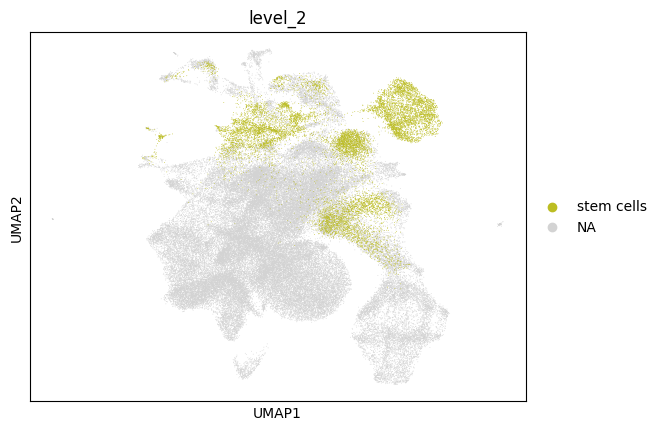

In [25]:
sc.pl.umap(adata, color='level_2', groups=['stem cells'])

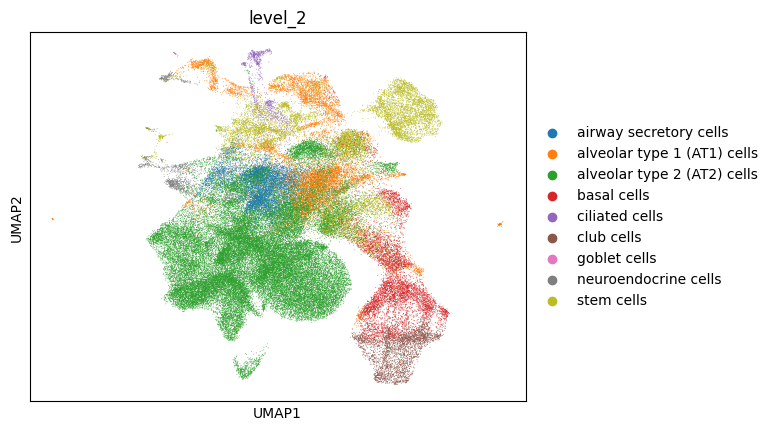

In [26]:
sc.pl.umap(adata, color='level_2')

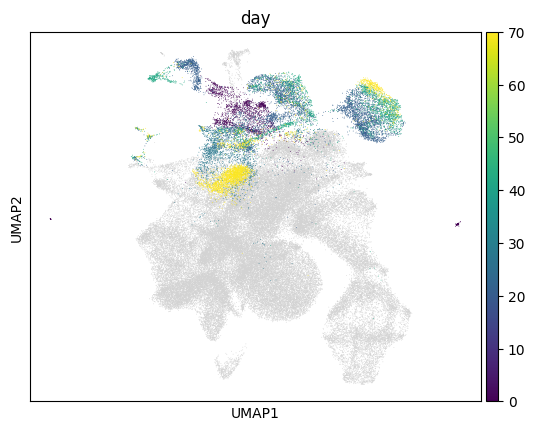

In [22]:
sc.pl.umap(adata, color='day')

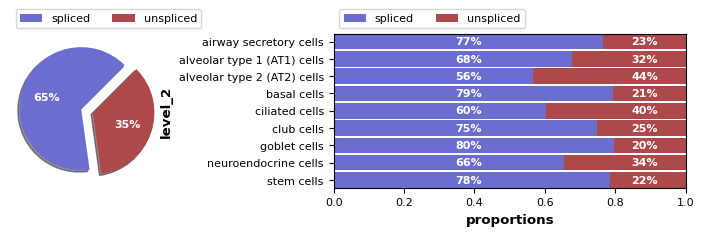

In [23]:
import scvelo as scv
scv.pl.proportions(adata, groupby='level_2')

In [27]:
# Remove small clusters on the right (causes problems in pseudotime)

In [29]:
sc.tl.leiden(adata, )

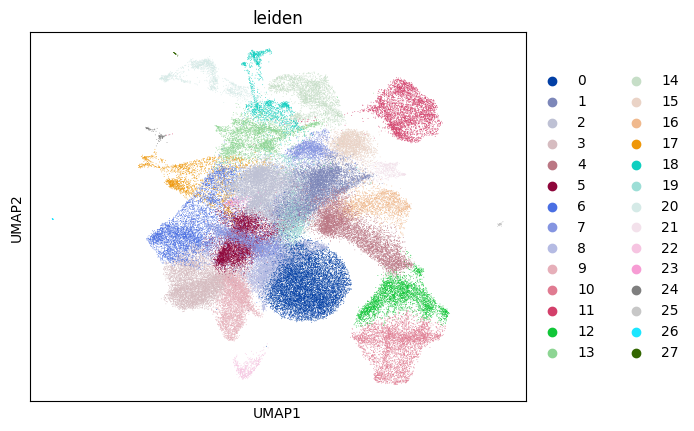

In [30]:
sc.pl.umap(adata, color='leiden')

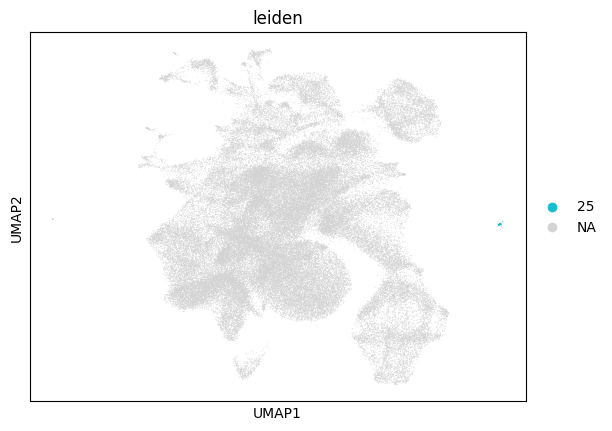

In [32]:
sc.pl.umap(adata, color='leiden', groups=['25'], palette='tab10')

In [ ]:
# Remove cluster 25

In [33]:
adata=adata[adata.obs['leiden']!='25'].copy()

In [34]:
del adata.obsp
del adata.uns['neighbors']
sc.pp.neighbors(adata, use_rep='X_scPoli')
sc.tl.umap(adata)

In [35]:
adata.write(f'{Path}/Lung_adata.h5ad')